# Multiclass Classifier

Abbiamo visto come utilizzare un classifier per distinguere le immagini che contenevano un '5' dalle immagini che 'non contenevano un 5'. Supponiamo ora di voler essere in grado di distinguere tutti i numeri da 0 a 9, allora ci serve un multiclass classifier.

Il SVM è un algoritmo che è nativamente binario, cioè non è in grado di gestire più classi contemporaneamete. Tuttavia esistono delle strategie che permettono di usare classificatori binari anche nel contesto delle multiclassi.

### One - Versus - Rest  

Un modo per poter classificare i numeri da 0 a 9 è quello di fare il training di 10 modelli di SVM diversi:
* '1' contro 'non 1'
* '2' contro 'non 2'
* ...
* '9' contro 'non 9'

Una volta che si hanno i 10 classificatori, all'arrivo di una nuova immagine si calcola per ognuno il **decision-score** (nel caso del SVM la decision_function), la classe con lo score più alto vince!

In [1]:
from sklearn import datasets
import numpy as np

mnist = datasets.load_digits()
mnist['target'] = mnist['target'].astype(np.int)

In [2]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, shuffle=True, random_state = 6)

In [3]:
from sklearn.svm import SVC

#decision_function_shape: decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’

svc_clf = SVC(decision_function_shape = 'ovr')
svc_clf.fit(X_train, y_train)

SVC()

In [4]:
svc_clf.predict([X_train[0]])

array([8])

In [5]:
y_train[0]

8

In [6]:
svc_clf.decision_function([X_train[0]])

array([[0.73614222, 0.73933103, 4.8136308 , 5.85417419, 2.75603798,
        1.76146471, 6.10965476, 3.76813356, 9.30089759, 8.29265897]])

In [7]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Lo score massimo si ha per la classe 8

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def show_image(x):
    plt.imshow(x.reshape(8,8), cmap="binary")
    plt.axis("off")
    plt.show()

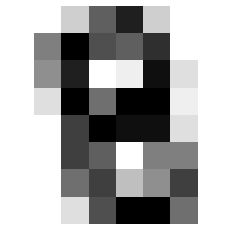

In [9]:
show_image(X_train[0])

In [10]:
import scikitplot as skplt

y_pred = svc_clf.predict(X_train)
skplt.metrics.plot_confusion_matrix(y_train, y_pred)



ModuleNotFoundError: No module named 'scikitplot'

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train, y_pred,average = 'weighted')
recall_score = recall_score(y_train, y_pred, average = 'weighted')
print('Precision Score: {} Recall Score {}'.format(precision_score,recall_score))

NameError: name 'y_pred' is not defined

ESERCIZIO: 
1. usando la funzione make_blobs(usa random_state=6) genera dei dati associati a 3 classi diverse
2. fai il training del modello SVC con kernel lineare;
3. genera il grafico dei punti e dei support_vectors;
4. fai predizioni sulla classe relativa al punto (-3,1) e controlla i valori della decision function;

[soluzione](./soluzione/oneVsRest.ipynb)

## One - Versus - One

Un'altra strategia è quella di fare training per ogni coppia di classi: una per distinguere 0 e 1, una per distinguere 0 e 2,...
Se ci sono N classi ci sarà bisogno di fare il training di N(N-1)/2

#### Per il caso del MNIST dobbiamo fare training di 45 classificatori!

Se si vuole fare predizioni su una nuova immagine bisognerà far fare predizioni a tutti i 45 classificatori, 
la classe che vince più duelli sarà quella vincente!

La scelta se applicare un approccio OvR o OvO dipende dal particolare algoritmo che state usando:

|         |OvR               |OvO          | 
|----------------------|-------------|-----------|
| Numero di classificatori | N          | N(N-1)/2       |
| Dataset di training      |tutto il dataset  | solo i dati relativi alle due classi |

In [12]:
svc_clf_ovo = SVC(decision_function_shape = 'ovo')
svc_clf_ovo.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [13]:
dec_function = svc_clf_ovo.decision_function([X_train[0]])
dec_function

array([[-1.32738544e-01, -2.03442297e-01, -5.78895797e-01,
         5.29314526e-03, -3.91491031e-01, -3.92204760e-01,
        -1.55512859e-01, -1.00051684e+00, -9.48341404e-01,
        -4.22312509e-01, -3.94924715e-01, -4.37378465e-02,
        -5.42088480e-02, -2.57887551e-01, -1.95236674e-01,
        -1.38558785e+00, -9.66144064e-01, -3.88476229e-01,
         8.79944562e-02,  1.02383315e-01, -9.20614406e-02,
         2.07790506e-01, -9.99997810e-01, -8.11514671e-01,
         1.14686544e-01,  8.89115447e-02,  1.80330700e-02,
        -3.47201173e-04, -1.31857995e+00, -1.04270723e+00,
         2.52028286e-02, -7.44897402e-01,  1.13610067e-01,
        -1.01368069e+00, -9.45755982e-01, -1.33983478e-01,
        -1.20788628e-01, -1.09478115e+00, -1.39589596e+00,
         3.89873132e-01, -9.99629702e-01, -5.03011343e-01,
        -1.03073339e+00, -1.01502207e+00,  4.33222062e-01]])

In [14]:
dec_function.shape

(1, 45)

In [15]:
svc_clf_ovo.predict([X_train[0]])

array([8])

In [16]:
import scikitplot as skplt

y_pred = svc_clf_ovo.predict(X_train)
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)

ModuleNotFoundError: No module named 'scikitplot'

In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train, y_pred,average = 'weighted')
recall_score = recall_score(y_train, y_pred, average = 'weighted')
print('Precision Score: {} Recall Score {}'.format(precision_score,recall_score))

NameError: name 'y_pred' is not defined